# Final Project: Data processing

## Initial Data Intake

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Read in data
DATA_PATH = "/content/drive/MyDrive/DATASCI 207/Final Project/NBA data - raw"
DATA_PATH_PROC = "/content/drive/MyDrive/DATASCI 207/Final Project/NBA data - processed"

In [3]:
# Function to loop through directories to read in files
def load_data(path_to_data):
    '''Load datasets
    Parameters:
    path_to_data (str): This is the path to data

    Returns:
    nba_data: A pandas dataframe
    '''
    # List all folders in data directory
    dir_list = os.listdir(path_to_data)

    # Initialize data
    nba_dfs = []
    vegas_dfs = []

    # Loop through NBA files
    for dir in dir_list:
      df = pd.read_csv(os.path.join(path_to_data, dir, "raw_scores.txt"),
                       delimiter=',', skiprows=[0], header=None)
      df['season'] = dir
      nba_dfs.append(df)

    # Loop through Vegas files
    for dir in dir_list:
      df = pd.read_csv(os.path.join(path_to_data, dir, "vegas.txt"),
                       delimiter=',')
      vegas_dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    nba_df = pd.concat(nba_dfs, ignore_index=True)
    vegas_df = pd.concat(vegas_dfs, ignore_index=True)

    # Name columns
    nba_df.columns = ["game_date", "game_sequence","game_id","team_id","team_abbr",
                      "team_city","game_result","pts_q1","pts_q2","pts_q3",
                      "pts_q4","pts_ot1","pts_ot2","pts_ot3","pts_ot4","pts_ot5",
                      "pts_ot6","pts_ot7","pts_ot8","pts_ot9","pts_ot10","pts_tot",
                      "fg_pct","ft_pct","fg3_pct","ast","reb","tov","season"]

    return nba_df, vegas_df

In [4]:
# Load data
nba_df, vegas_df = load_data(DATA_PATH)

## Pre-processing

In [5]:
# Show NBA columns
nba_df.columns

Index(['game_date', 'game_sequence', 'game_id', 'team_id', 'team_abbr',
       'team_city', 'game_result', 'pts_q1', 'pts_q2', 'pts_q3', 'pts_q4',
       'pts_ot1', 'pts_ot2', 'pts_ot3', 'pts_ot4', 'pts_ot5', 'pts_ot6',
       'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10', 'pts_tot', 'fg_pct',
       'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov', 'season'],
      dtype='object')

In [6]:
# Show Vegas columns
vegas_df.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spread',
       'Worst_Line_Spread', 'Best_Odds_Spread', 'Worst_Odds_Spread',
       'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU',
       'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line

In [7]:
# Some NBA OT columns have no info
nba_df[['pts_ot5', 'pts_ot6', 'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10']].describe()

# Drop NBA OT columns
nba_df = nba_df.drop(['pts_ot5', 'pts_ot6', 'pts_ot7', 'pts_ot8', 'pts_ot9', 'pts_ot10'], axis=1)

In [8]:
# Select desired Vegas columns
vegas_df = vegas_df[['Location', 'TeamId', 'GameId', 'Average_Line_Spread', 'Spread', 'Result']]
vegas_df.columns = ['location', 'team_id', 'game_id', 'vegas_spread', 'spread', 'result']

# Merge data
combined_df = pd.merge(nba_df, vegas_df, on=['team_id', 'game_id'], how='left')

In [9]:
# Dimensions
print("Combined shape:", combined_df.shape)
print("NBA data shape:", nba_df.shape)
print("Vegas data shape:", vegas_df.shape)

Combined shape: (17226, 27)
NBA data shape: (17226, 23)
Vegas data shape: (17208, 6)


In [28]:
# Check NAs
print(combined_df.isna().sum())

game_date         0
game_id           0
team_id           0
team_abbr         0
season            0
location          0
vegas_spread      0
spread            0
pts_tot_last5     0
fg_pct_last5      0
ft_pct_last5      0
fg3_pct_last5     0
ast_last5         0
reb_last5         0
tov_last5         0
wr_last5          0
pts_tot_last10    0
fg_pct_last10     0
ft_pct_last10     0
fg3_pct_last10    0
ast_last10        0
reb_last10        0
tov_last10        0
wr_last10         0
pts_tot_last20    0
fg_pct_last20     0
ft_pct_last20     0
fg3_pct_last20    0
ast_last20        0
reb_last20        0
tov_last20        0
wr_last20         0
dtype: int64


In [10]:
# Inspect games without Vegas spread
combined_df[combined_df['vegas_spread'].isna()]

,game_date,game_sequence,game_id,team_id,team_abbr,team_city,game_result,pts_q1,pts_q2,pts_q3,pts_q4,pts_ot1,pts_ot2,pts_ot3,pts_ot4,pts_tot,fg_pct,ft_pct,fg3_pct,ast,reb,tov,season,location,vegas_spread,spread,result
1698,2017-02-19,1,31600001,1610616833,EST,East NBA All Stars,0-1,53,39,47,43,0,0,0,0,182,0.569,1.000,0.373,43,50,19,2016-17,NaN,NaN,NaN,NaN
1699,2017-02-19,1,31600001,1610616834,WST,West NBA All Stars,1-0,48,49,47,48,0,0,0,0,192,0.587,0.750,0.333,60,61,17,2016-17,NaN,NaN,NaN,NaN
4888,2013-04-16,2,21201214,1610612754,IND,Indiana,49-32,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,2012-13,NaN,NaN,NaN,NaN
4889,2013-04-16,2,21201214,1610612738,BOS,Boston,41-40,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,2012-13,NaN,NaN,NaN,NaN
4974,2014-11-01,1,21400027,1610612742,DAL,Dallas,2-1,32,34,20,23,0,0,0,0,109,0.517,0.579,0.240,25,44,12,2014-15,away,NaN,5.0,W
4975,2014-11-01,1,21400027,1610612740,NOP,New Orleans,1-1,26,26,37,15,0,0,0,0,104,0.427,0.750,0.368,24,47,13,2014-15,home,NaN,-5.0,L
6748,2015-03-06,5,21400920,1610612748,MIA,Miami,27-34,18,21,34,24,0,0,0,0,97,0.468,0.684,0.370,18,37,14,2014-15,NaN,NaN,NaN,NaN
6749,2015-03-06,5,21400920,1610612764,WAS,Washington,35-27,40,27,21,11,0,0,0,0,99,0.463,0.889,0.304,24,43,15,2014-15,NaN,NaN,NaN,NaN
7540,2015-11-06,6,21500080,1610612748,MIA,Miami,3-3,26,23,19,19,0,0,0,0,87,0.444,0.692,0.300,21,40,11,2015-16,away,NaN,-3.0,L
7541,2015-11-06,6,21500080,1610612754,IND,Indiana,3-3,16,33,22,19,0,0,0,0,90,0.450,0.542,0.333,21,43,12,2015-16,home,NaN,3.0,W


In [11]:
# Games without Vegas spread are limited (6 All-Star games + 16 add'l). Drop games.
combined_df = combined_df.dropna()

In [12]:
# Drop unnecessary columns
combined_df = combined_df.drop(['game_sequence', 'game_result', 'team_city'], axis=1)
combined_df.head()

,game_date,game_id,team_id,team_abbr,pts_q1,pts_q2,pts_q3,pts_q4,pts_ot1,pts_ot2,pts_ot3,pts_ot4,pts_tot,fg_pct,ft_pct,fg3_pct,ast,reb,tov,season,location,vegas_spread,spread,result
0,2016-10-25,21600001,1610612752,NYK,18,27,19,24,0,0,0,0,88,0.368,0.750,0.333,17,42,18,2016-17,away,9.33,-29.0,L
1,2016-10-25,21600001,1610612739,CLE,28,20,34,35,0,0,0,0,117,0.479,0.737,0.371,31,51,14,2016-17,home,-9.33,29.0,W
2,2016-10-25,21600002,1610612762,UTA,26,20,37,21,0,0,0,0,104,0.488,1.000,0.333,19,31,11,2016-17,away,6.00,-9.0,L
3,2016-10-25,21600002,1610612757,POR,26,28,23,36,0,0,0,0,113,0.520,1.000,0.684,22,34,12,2016-17,home,-6.00,9.0,W
4,2016-10-25,21600003,1610612759,SAS,31,33,33,32,0,0,0,0,129,0.480,0.885,0.500,25,55,13,2016-17,away,8.25,29.0,W


In [13]:
# Encode result column
combined_df['result'] = combined_df['result'].apply(lambda x: 1 if x == 'W' else 0)

In [14]:
# Function for mean of statistics in last n games
def mean_last_n(series, n):
  series_shift = series.shift(1)
  result = series_shift.rolling(window=n, min_periods=0).mean()
  return result

# Function for winrate in last n games
def wr_last_n(series, n):
  series_shift = series.shift(1)
  wins = series_shift.rolling(window=n, min_periods=0).sum()
  games = series_shift.rolling(window=n, min_periods=0).count()
  wr = wins / games
  return wr

# Function to calculate team performance in last n games
def gen_last_n(df, n):
  vars = ['pts_tot', 'fg_pct', 'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov']
  df = df.sort_values(by=['team_id', 'game_date'])
  for var in vars:
    df[var + '_last' + str(n)] = df.groupby('team_id')[var].apply(lambda x: mean_last_n(x, n)).reset_index(level=0, drop=True)
  df['wr_last' + str(n)] = df.groupby('team_id')['result'].apply(lambda x: wr_last_n(x, n)).reset_index(level=0, drop=True)
  return df

In [15]:
# Calculate team performance in last 5/10/20 games
combined_df = gen_last_n(combined_df, 5)
combined_df = gen_last_n(combined_df, 10)
combined_df = gen_last_n(combined_df, 20)

# Set ID types
combined_df['game_id'] = combined_df['game_id'].astype(str)
combined_df['team_id'] = combined_df['team_id'].astype(str)

# Sort and data
combined_df = combined_df.sort_values(by=['season', 'game_date', 'game_id', 'location']).reset_index(drop=True)

In [16]:
# Check proper performance variable processing of a data sample
combined_df[combined_df['team_abbr'] == "ATL"][['team_abbr', 'game_date', 'tov', 'tov_last5', 'tov_last10', 'tov_last20']].head(20)

,team_abbr,game_date,tov,tov_last5,tov_last10,tov_last20
33,ATL,2012-11-02,13,NaN,NaN,NaN
76,ATL,2012-11-04,10,13.000000,13.000000,13.000000
107,ATL,2012-11-07,17,11.500000,11.500000,11.500000
141,ATL,2012-11-09,13,13.333333,13.333333,13.333333
178,ATL,2012-11-11,22,13.250000,13.250000,13.250000
200,ATL,2012-11-12,16,15.000000,15.000000,15.000000
232,ATL,2012-11-14,12,15.600000,15.166667,15.166667
252,ATL,2012-11-16,15,16.000000,14.714286,14.714286
295,ATL,2012-11-19,13,15.600000,14.750000,14.750000
321,ATL,2012-11-21,13,15.600000,14.555556,14.555556


In [17]:
# Drop early games without historical performance data - should be 30 teams
print("Before:", combined_df.shape)
combined_df = combined_df.dropna()
print("After:", combined_df.shape)

Before: (17204, 48)
After: (17174, 48)


## EDA

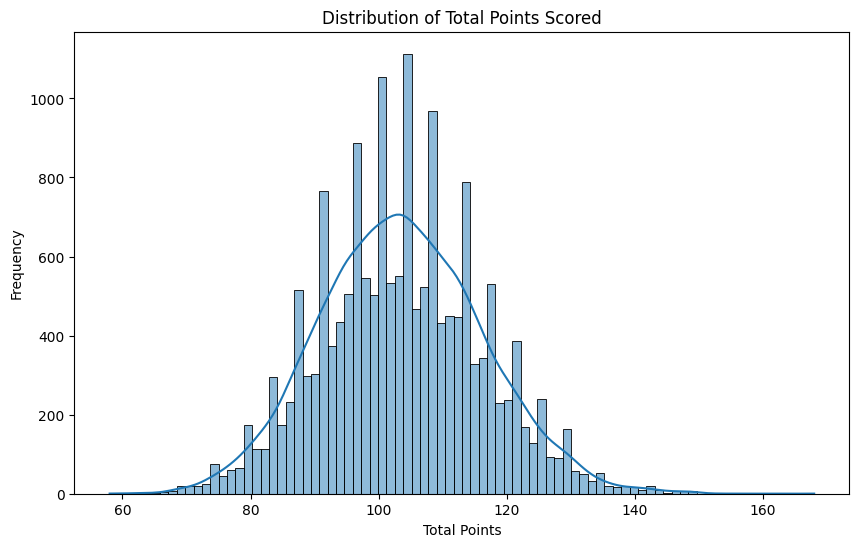

In [18]:
# Distribution of total points scored
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['pts_tot'], kde=True)
plt.title('Distribution of Total Points Scored')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.show()

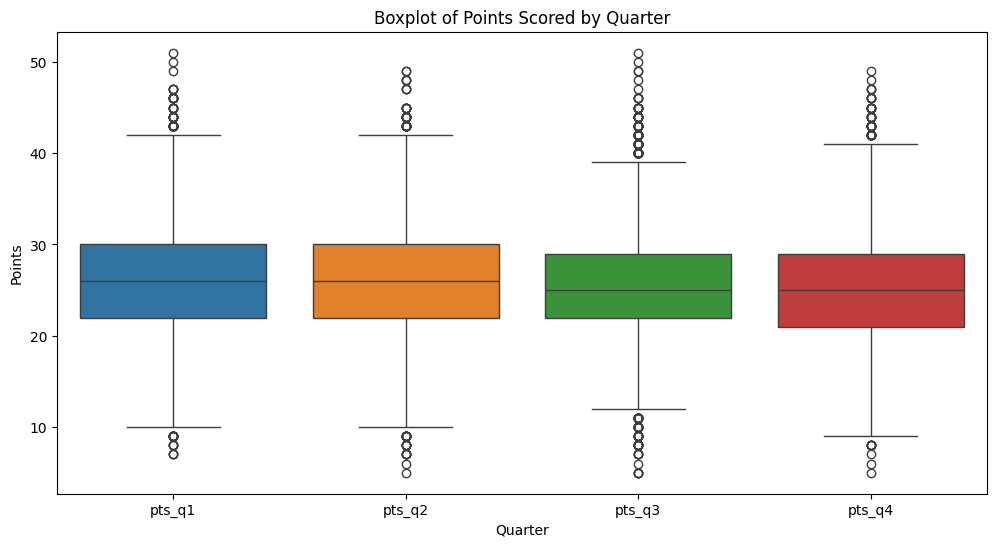

In [19]:
# Boxplot of points scored by each quarter
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df[['pts_q1', 'pts_q2', 'pts_q3', 'pts_q4']])
plt.title('Boxplot of Points Scored by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Points')
plt.show()

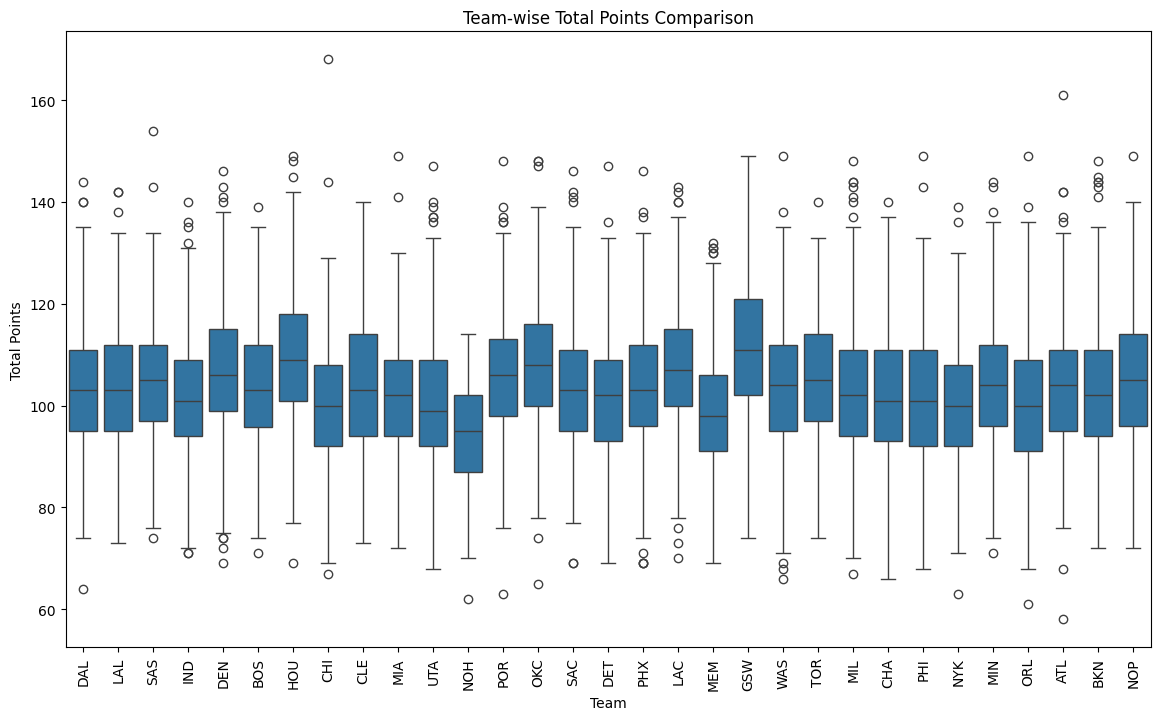

In [20]:
# Team-wise points comparison
plt.figure(figsize=(14, 8))
sns.boxplot(x='team_abbr', y='pts_tot', data=combined_df)
plt.title('Team-wise Total Points Comparison')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.xticks(rotation=90)
plt.show()

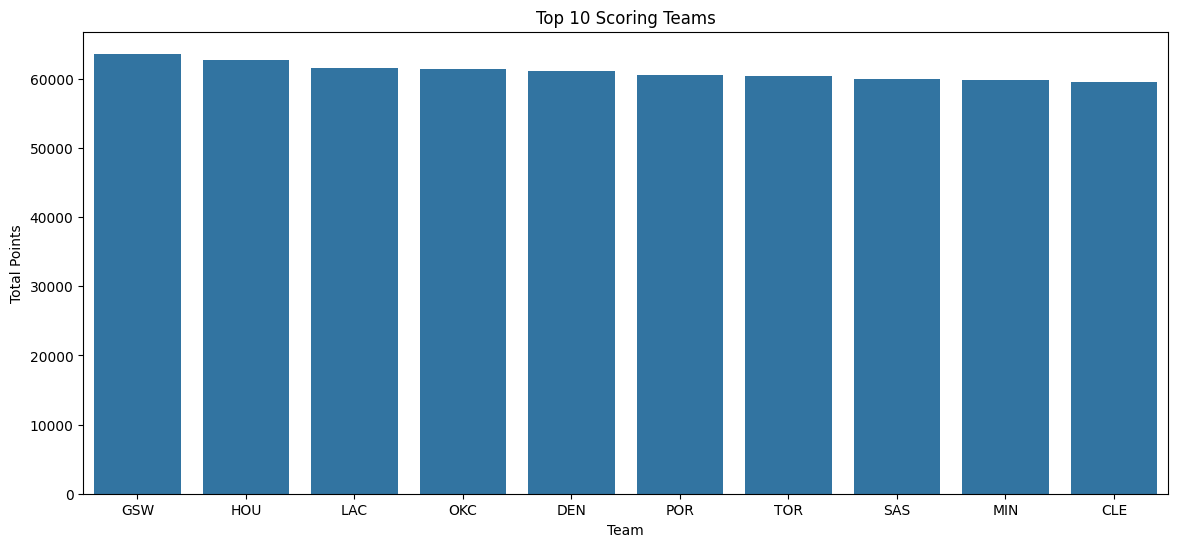

In [21]:
# Top scoring teams
top_teams = combined_df.groupby('team_abbr')['pts_tot'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Top 10 Scoring Teams')
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.show()

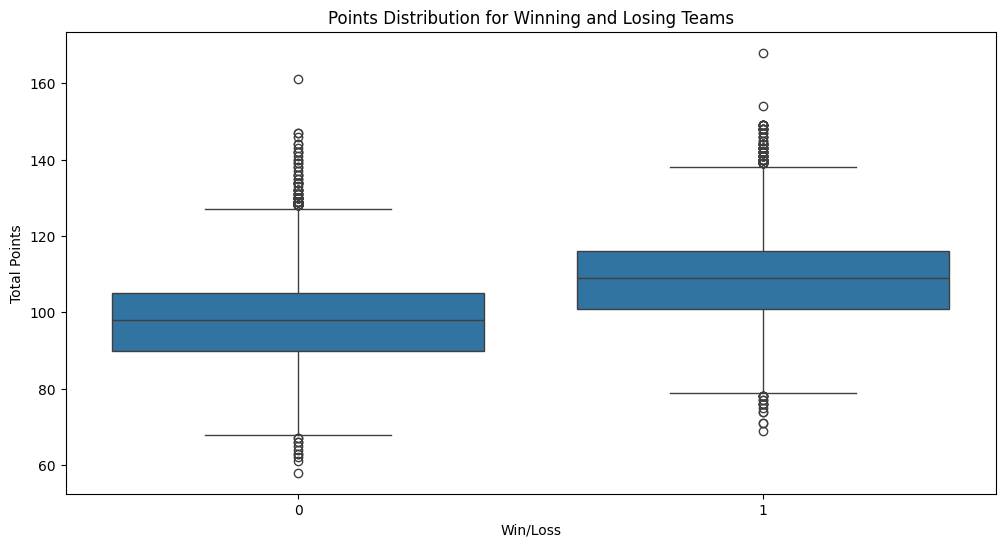

In [22]:
# Boxplot of points for winning and losing teams
plt.figure(figsize=(12, 6))
sns.boxplot(x='result', y='pts_tot', data=combined_df)
plt.title('Points Distribution for Winning and Losing Teams')
plt.xlabel('Win/Loss')
plt.ylabel('Total Points')
plt.show()

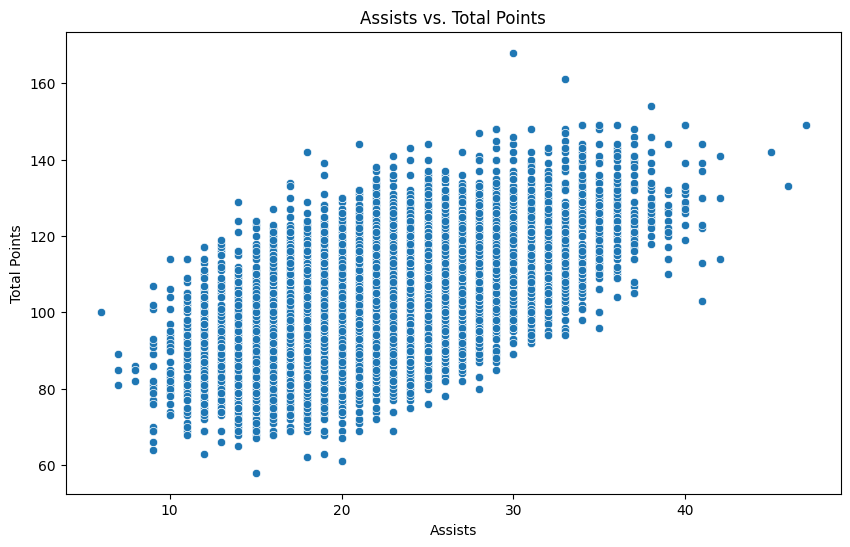

In [23]:
# Scatter plot of assists vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ast', y='pts_tot', data=combined_df)
plt.title('Assists vs. Total Points')
plt.xlabel('Assists')
plt.ylabel('Total Points')
plt.show()

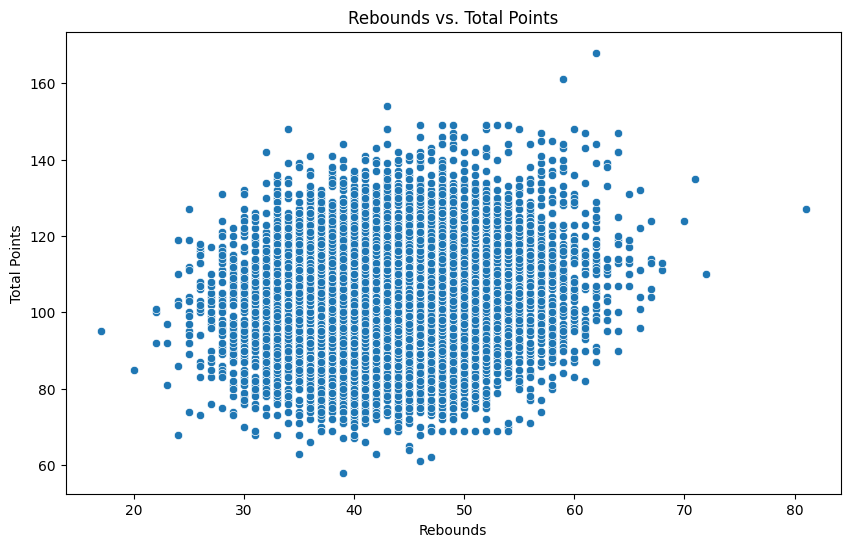

In [24]:
# Scatter plot of rebounds vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reb', y='pts_tot', data=combined_df)
plt.title('Rebounds vs. Total Points')
plt.xlabel('Rebounds')
plt.ylabel('Total Points')
plt.show()

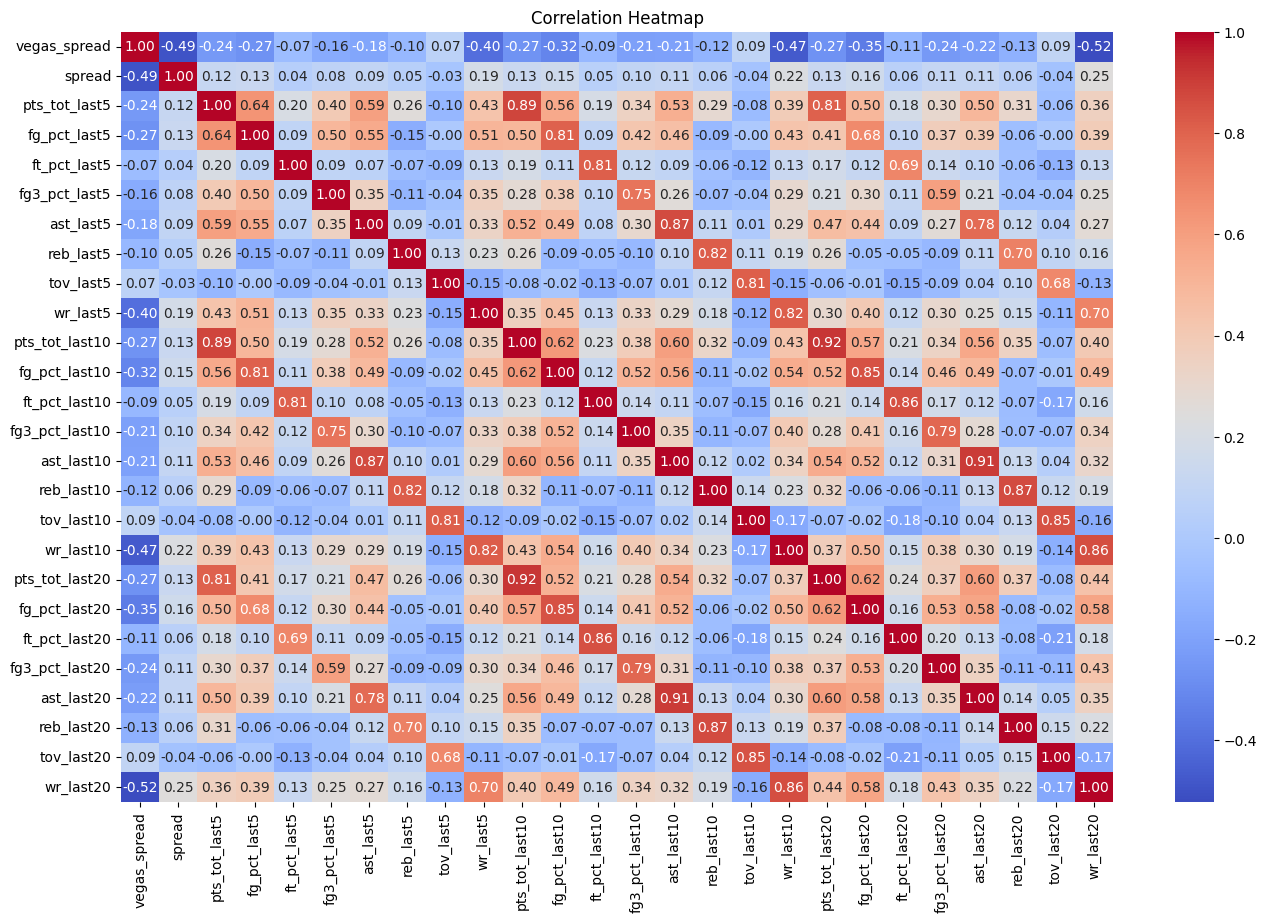

In [25]:
# Drop current-game variables not used for prediction
combined_df = combined_df.drop(['pts_q1', 'pts_q2','pts_q3', 'pts_q4', 'pts_ot1',
                                'pts_ot2', 'pts_ot3', 'pts_ot4', 'pts_tot', 'fg_pct',
                                'ft_pct', 'fg3_pct', 'ast', 'reb', 'tov', 'result'],
                                axis=1)

# Correlation heatmap
plt.figure(figsize=(16, 10))
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(combined_df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Additional pre-processing

In [26]:
# Reshape wide on game level
cols_to_pivot = ['team_abbr', 'vegas_spread', 'spread', 'pts_tot_last5',
                 'fg_pct_last5', 'ft_pct_last5', 'fg3_pct_last5', 'ast_last5',
                 'reb_last5', 'tov_last5', 'wr_last5', 'pts_tot_last10',
                 'fg_pct_last10', 'ft_pct_last10', 'fg3_pct_last10', 'ast_last10',
                 'reb_last10', 'tov_last10', 'wr_last10', 'pts_tot_last20',
                 'fg_pct_last20', 'ft_pct_last20', 'fg3_pct_last20', 'ast_last20',
                 'reb_last20', 'tov_last20', 'wr_last20']
game_df = combined_df.pivot(index=['game_id', 'game_date', 'season'], columns='location', values=cols_to_pivot)

# Flatten columns
game_df.columns = ['_'.join(col).strip() for col in game_df.columns.values]

# Drop away spreads
game_df = game_df.drop(['vegas_spread_away', 'spread_away'], axis=1)

# Rename columns
game_df = game_df.rename(columns={'game_id_': 'game_id',
                                  'game_date_': 'game_date',
                                  'season_': 'season',
                                  'vegas_spread_home': 'vegas_spread',
                                  'spread_home': 'spread',})

# Some games only have information for one team - drop these games
game_df = game_df.dropna()

# Reset index
game_df = game_df.reset_index()
game_df.head()

,game_id,game_date,season,team_abbr_away,team_abbr_home,vegas_spread,spread,pts_tot_last5_away,pts_tot_last5_home,fg_pct_last5_away,fg_pct_last5_home,ft_pct_last5_away,ft_pct_last5_home,fg3_pct_last5_away,fg3_pct_last5_home,ast_last5_away,ast_last5_home,reb_last5_away,reb_last5_home,tov_last5_away,tov_last5_home,wr_last5_away,wr_last5_home,pts_tot_last10_away,pts_tot_last10_home,fg_pct_last10_away,fg_pct_last10_home,ft_pct_last10_away,ft_pct_last10_home,fg3_pct_last10_away,fg3_pct_last10_home,ast_last10_away,ast_last10_home,reb_last10_away,reb_last10_home,tov_last10_away,tov_last10_home,wr_last10_away,wr_last10_home,pts_tot_last20_away,pts_tot_last20_home,fg_pct_last20_away,fg_pct_last20_home,ft_pct_last20_away,ft_pct_last20_home,fg3_pct_last20_away,fg3_pct_last20_home,ast_last20_away,ast_last20_home,reb_last20_away,reb_last20_home,tov_last20_away,tov_last20_home,wr_last20_away,wr_last20_home
0,21200013,2012-11-26,2012-13,NYK,BKN,1.17,7.0,105.0,93.2,0.446,0.4486,0.8208,0.745,0.4208,0.3076,21.8,23.4,40.2,39.4,11.6,11.6,0.6,0.6,103.7,94.4,0.4566,0.4459,0.7929,0.7225,0.3935,0.2955,20.0,21.6,39.4,42.6,10.3,12.7,0.7,0.7,103.416667,95.583333,0.458417,0.449583,0.783917,0.723083,0.405833,0.326667,20.416667,21.666667,39.5,41.333333,10.75,13.083333,0.75,0.666667
1,21200019,2012-11-02,2012-13,CHI,CLE,2.67,-29.0,93.0,94.0,0.418,0.456,0.758,0.682,0.222,0.35,21.0,22.0,46.0,54.0,18.0,20.0,1.0,1.0,93.0,94.0,0.418,0.456,0.758,0.682,0.222,0.35,21.0,22.0,46.0,54.0,18.0,20.0,1.0,1.0,93.0,94.0,0.418,0.456,0.758,0.682,0.222,0.35,21.0,22.0,46.0,54.0,18.0,20.0,1.0,1.0
2,21200021,2012-11-02,2012-13,UTA,NOH,3.5,2.0,113.0,95.0,0.427,0.438,0.738,0.913,0.429,0.235,24.0,26.0,61.0,43.0,14.0,13.0,1.0,0.0,113.0,95.0,0.427,0.438,0.738,0.913,0.429,0.235,24.0,26.0,61.0,43.0,14.0,13.0,1.0,0.0,113.0,95.0,0.427,0.438,0.738,0.913,0.429,0.235,24.0,26.0,61.0,43.0,14.0,13.0,1.0,0.0
3,21200022,2012-11-02,2012-13,POR,OKC,-8.58,14.0,116.0,84.0,0.506,0.377,0.821,0.826,0.45,0.412,19.0,18.0,30.0,48.0,12.0,18.0,1.0,0.0,116.0,84.0,0.506,0.377,0.821,0.826,0.45,0.412,19.0,18.0,30.0,48.0,12.0,18.0,1.0,0.0,116.0,84.0,0.506,0.377,0.821,0.826,0.45,0.412,19.0,18.0,30.0,48.0,12.0,18.0,1.0,0.0
4,21200024,2012-11-02,2012-13,DET,PHX,-4.42,3.0,96.0,85.0,0.443,0.4,0.769,0.773,0.375,0.19,21.0,16.0,36.0,44.0,16.0,18.0,0.0,0.0,96.0,85.0,0.443,0.4,0.769,0.773,0.375,0.19,21.0,16.0,36.0,44.0,16.0,18.0,0.0,0.0,96.0,85.0,0.443,0.4,0.769,0.773,0.375,0.19,21.0,16.0,36.0,44.0,16.0,18.0,0.0,0.0


In [27]:
# Data split
X_train = game_df[game_df['season'].isin(['2012-13', '2013-14', '2014-15', '2015-16', '2016-17'])]
X_val = game_df[game_df['season'] == '2017-18']
X_test = game_df[game_df['season'] == '2018-19']

# Separate labels
y_train = X_train[['spread', 'vegas_spread']]
y_val = X_val[['spread', 'vegas_spread']]
y_test = X_test[['spread', 'vegas_spread']]

# Remove labels from features
X_train = X_train.drop(['spread', 'vegas_spread'], axis=1)
X_val = X_val.drop(['spread', 'vegas_spread'], axis=1)
X_test = X_test.drop(['spread', 'vegas_spread'], axis=1)

# Reset index
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Save data
X_train.to_csv(os.path.join(DATA_PATH_PROC, 'X_train.csv'), index=False)
X_val.to_csv(os.path.join(DATA_PATH_PROC, 'X_val.csv'), index=False)
X_test.to_csv(os.path.join(DATA_PATH_PROC, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(DATA_PATH_PROC, 'y_train.csv'), index=False)
y_val.to_csv(os.path.join(DATA_PATH_PROC, 'y_val.csv'), index=False)
y_test.to_csv(os.path.join(DATA_PATH_PROC, 'y_test.csv'), index=False)